In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
print(keras.__version__)

1.15.0-rc1
2.2.4-tf


## Download the IMDB dataset

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

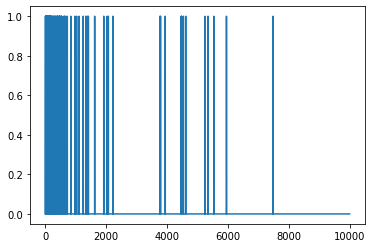

In [3]:
plt.plot(train_data[0])

## Create a baseline model

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4919 - acc: 0.7965 - binary_crossentropy: 0.4919 - val_loss: 0.3283 - val_acc: 0.8783 - val_binary_crossentropy: 0.3283
Epoch 2/20
25000/25000 - 1s - loss: 0.2428 - acc: 0.9120 - binary_crossentropy: 0.2428 - val_loss: 0.2831 - val_acc: 0.8878 - val_binary_crossentropy: 0.2831
Epoch 3/20
25000/25000 - 1s - loss: 0.1744 - acc: 0.9381 - binary_crossentropy: 0.1744 - val_loss: 0.2982 - val_acc: 0.8815 - val_binary_crossentropy: 0.2982
Epoch 4/20
25000/25000 - 1s - loss: 0.1412 - acc: 0.9517 - binary_crossentropy: 0.1412 - val_loss: 0.3435 - val_acc: 0.8690 - val_binary_crossentropy: 0.3435
Epoch 5/20
25000/25000 - 1s - loss: 0.1161 - acc: 0.9610 - binary_crossentropy: 0.1161 - val_loss: 0.3510 - val_acc: 0.8711 - val_binary_crossentropy: 0.3510
Epoch 6/20
25000/25000 - 1s - loss: 0.0956 - acc: 0.9699 - binary_crossentropy: 0.0956 - val_loss: 0.3848 - val_acc: 0.8679 - val_binary_crossentropy: 0.3848
Ep

## Create a smaller model

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data, train_labels,
                                   epochs=20, batch_size=512, 
                                   validation_data=(test_data, test_labels),
                                   verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 55us/sample - loss: 0.6292 - acc: 0.5980 - binary_crossentropy: 0.6292 - val_loss: 0.5731 - val_acc: 0.7195 - val_binary_crossentropy: 0.5731
Epoch 2/20
25000/25000 [==============================] - 1s 49us/sample - loss: 0.5182 - acc: 0.8206 - binary_crossentropy: 0.5182 - val_loss: 0.4969 - val_acc: 0.8226 - val_binary_crossentropy: 0.4969
Epoch 3/20
25000/25000 [==============================] - 1s 50us/sample - loss: 0.4182 - acc: 0.8929 - binary_crossentropy: 0.4182 - val_loss: 0.3858 - val_acc: 0.8714 - val_binary_crossentropy: 0.3858
Epoch 4/20
25000/25000 [==============================] - 1s 48us/sample - loss: 0.2933 - acc: 0.9199 - binary_crossentropy: 0.2933 - val_loss: 0.3151 - val_acc: 0.8852 - val_binary_crossentropy: 0.3151
Epoch 5/20
25000/25000 [==============================] - 1s 48us/sample - loss: 0.2306 - acc: 0.9290 - binary_crossentropy: 0.2306 - val_

## Create a bigger model

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 128us/sample - loss: 0.3457 - acc: 0.8513 - binary_crossentropy: 0.3457 - val_loss: 0.3158 - val_acc: 0.8699 - val_binary_crossentropy: 0.3158
Epoch 2/20
25000/25000 [==============================] - 3s 129us/sample - loss: 0.1402 - acc: 0.9496 - binary_crossentropy: 0.1402 - val_loss: 0.3298 - val_acc: 0.8758 - val_binary_crossentropy: 0.3298
Epoch 3/20
25000/25000 [==============================] - 3s 131us/sample - loss: 0.0410 - acc: 0.9884 - binary_crossentropy: 0.0410 - val_loss: 0.4465 - val_acc: 0.8687 - val_binary_crossentropy: 0.4465
Epoch 4/20
25000/25000 [==============================] - 3s 131us/sample - loss: 0.0051 - acc: 0.9994 - binary_crossentropy: 0.0051 - val_loss: 0.5930 - val_acc: 0.8697 - val_binary_crossentropy: 0.5930
Epoch 5/20
25000/25000 [==============================] - 3s 126us/sample - loss: 5.3919e-04 - acc: 1.0000 - binary_crossentropy: 5.39

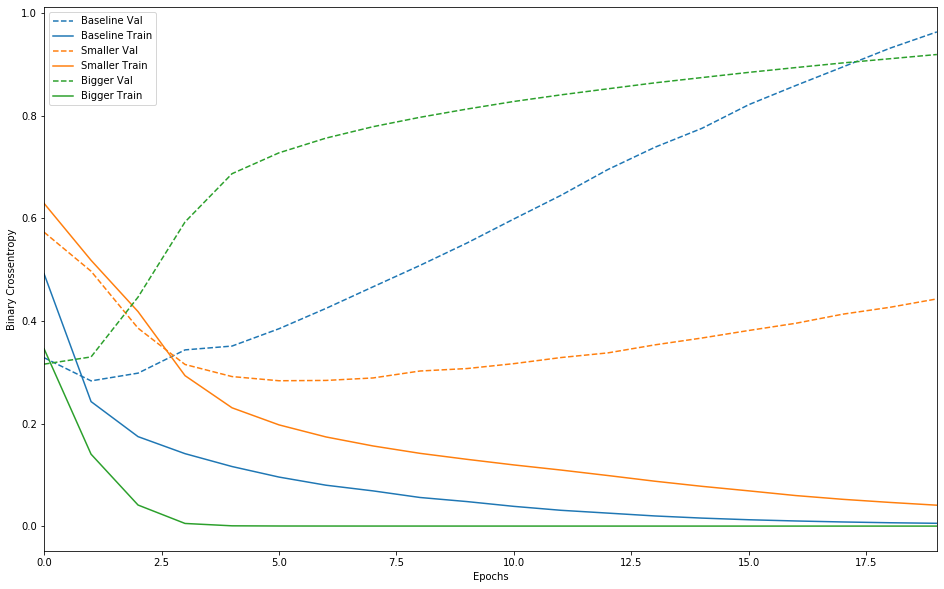

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key],
                color=val[0].get_color(), label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

bigger_model overfit from the start of training
baseline_model overfit more quickly than smaller_model

## Add weights regularization

Associating with to Occam's Razor, a "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.This cost comes in two flavors:
L1 reaularization or L2 regularization(aka 'weight decay')

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(1e-3),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(1e-3),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20, batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 56us/sample - loss: 0.5283 - acc: 0.8008 - binary_crossentropy: 0.4900 - val_loss: 0.3756 - val_acc: 0.8767 - val_binary_crossentropy: 0.3347
Epoch 2/20
25000/25000 [==============================] - 1s 52us/sample - loss: 0.3003 - acc: 0.9066 - binary_crossentropy: 0.2542 - val_loss: 0.3338 - val_acc: 0.8882 - val_binary_crossentropy: 0.2840
Epoch 3/20
25000/25000 [==============================] - 1s 51us/sample - loss: 0.2489 - acc: 0.9305 - binary_crossentropy: 0.1963 - val_loss: 0.3394 - val_acc: 0.8860 - val_binary_crossentropy: 0.2852
Epoch 4/20
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2281 - acc: 0.9399 - binary_crossentropy: 0.1720 - val_loss: 0.3592 - val_acc: 0.8781 - val_binary_crossentropy: 0.3018
Epoch 5/20
25000/25000 [==============================] - 1s 49us/sample - loss: 0.2128 - acc: 0.9477 - binary_crossentropy: 0.1544 - val_

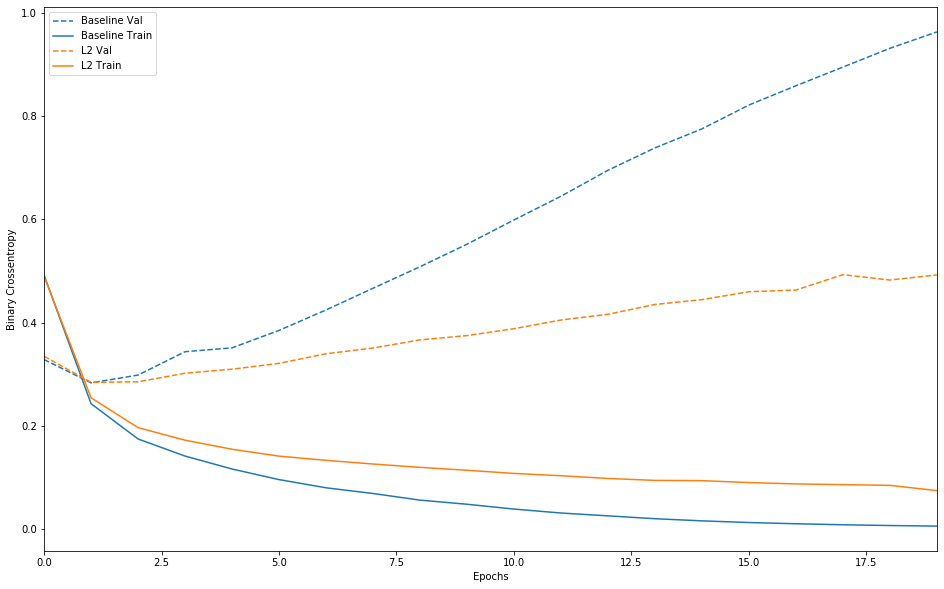

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## Add dropout

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6377 - acc: 0.6321 - binary_crossentropy: 0.6377 - val_loss: 0.5235 - val_acc: 0.8496 - val_binary_crossentropy: 0.5235
Epoch 2/20
25000/25000 - 1s - loss: 0.4980 - acc: 0.7723 - binary_crossentropy: 0.4980 - val_loss: 0.3707 - val_acc: 0.8772 - val_binary_crossentropy: 0.3707
Epoch 3/20
25000/25000 - 1s - loss: 0.3900 - acc: 0.8389 - binary_crossentropy: 0.3900 - val_loss: 0.3042 - val_acc: 0.8869 - val_binary_crossentropy: 0.3042
Epoch 4/20
25000/25000 - 1s - loss: 0.3257 - acc: 0.8734 - binary_crossentropy: 0.3257 - val_loss: 0.2779 - val_acc: 0.8896 - val_binary_crossentropy: 0.2779
Epoch 5/20
25000/25000 - 1s - loss: 0.2768 - acc: 0.8958 - binary_crossentropy: 0.2768 - val_loss: 0.2735 - val_acc: 0.8891 - val_binary_crossentropy: 0.2735
Epoch 6/20
25000/25000 - 1s - loss: 0.2430 - acc: 0.9116 - binary_crossentropy: 0.2430 - val_loss: 0.2834 - val_acc: 0.8848 - val_binary_crossentropy: 0.2834
Ep

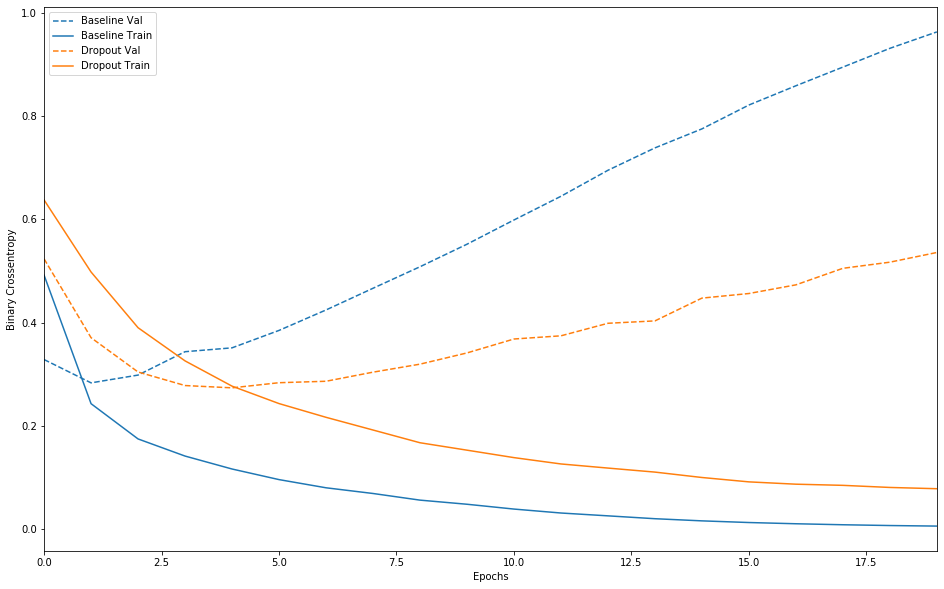

In [18]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])